# Combining multiple static diagrams

It is possible to combine multiple `tulips` diagrams (at one particular time) in a single figure. This can provide additional insights about the properties of stellar models. In this notebook we demonstrate how you can do this and what you can learn from it. Let's plot an [energy and mixing diagram](energy_and_mixing_diagram.ipynb) together with a [perceived color diagram](perceived_color_diagram.ipynb) of an 11 $M_{\odot}$ star. The perceived color diagram can show any property that is stored in the MESA output file of the stellar model. In our case we are interested in the helium core mass so we choose `raxis=he_core_mass`. To plot these diagrams in the same figure, we pass the same `fig` and `ax` that are returned from the `energy_and_mixing` function to the `perceived_color` function with `fig=fig` and `ax=ax`. In this way, `tulips` plots the perceived color diagram on the same figure and axis objects as the energy and mixing diagram. However, when we do this, the diagrams will be plotted on top of each other, which makes it difficult to interpret. Therefore, we choose different starting and ending angles so that each diagram covers only part of the circle. This can be done using the `theta1` and `theta2` properties. The angles are given in units of degrees and start counterclockwise from the horizontal axis. We choose to plot the stellar model at `time_ind=2000` and change the axis limit and label with the `axis_lim` and `axis_label` options. 

In [7]:
# Interactive matplotlib plotting for jupyter lab
%matplotlib inline

# If you use jupyter notebook
# %matplotlib notebook

import matplotlib.pyplot as plt
import mesaPlot as mp
import tulips

EXAMPLE_DIR = "../../tulips/MESA_DIR_EXAMPLE/"

m11 = mp.MESA() # Create MESA object
m11.loadHistory(filename_in=EXAMPLE_DIR + 'history.data')

In [8]:
# # Use LaTeX in the plots

col_w = 3.5    # Figure width in inches, columnswidth
text_w = 7.25 # Full page figure width
plt.rcParams.update({
    'figure.figsize': (col_w, col_w/(4/3.)),     # 4:3 aspect ratio
    'font.size' : 11,                   # Set font size to 11pt
    'axes.labelsize': 11,               # -> axis labels
    'legend.fontsize': 9,              # -> legends
    'font.family': 'lmodern',
    'text.usetex': True,
    'text.latex.preamble': (            # LaTeX preamble
        r'\usepackage{lmodern}'
        # ... more packages if needed
    ),
    'figure.dpi': 200,
})

import warnings
warnings.filterwarnings("ignore")

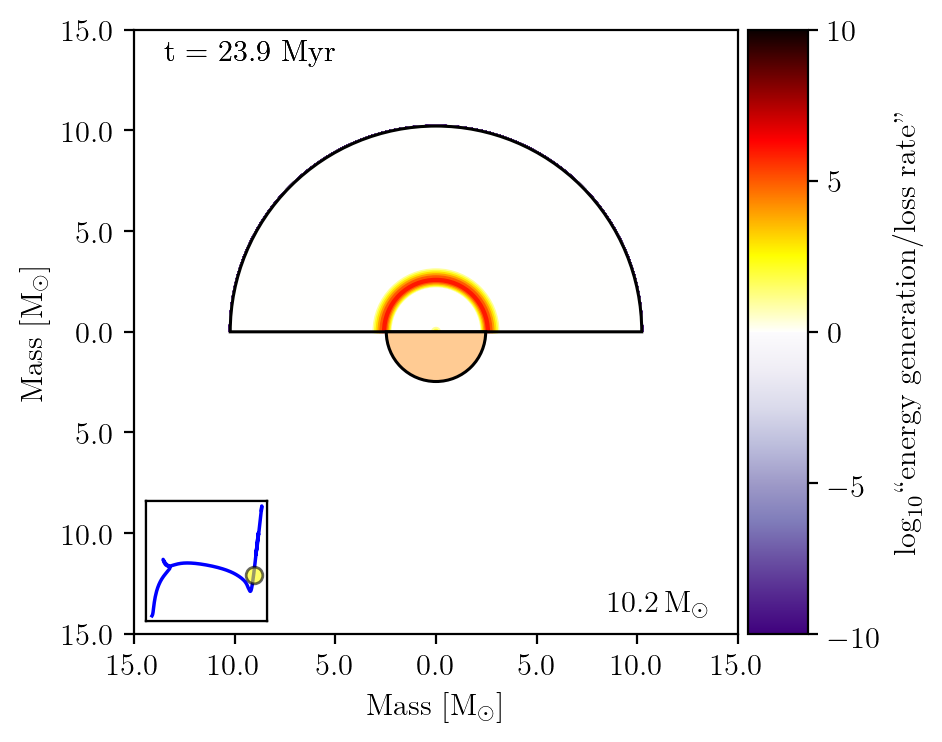

In [11]:
fig, ax = tulips.energy_and_mixing(m11, time_ind=2000, theta1=0, theta2=180)
tulips.perceived_color(m11, time_ind=2000, raxis='he_core_mass', fig=fig, ax=ax, theta1=180, theta2=360, axis_label='Mass $[\mathrm{M}_{\odot}]$', axis_lim=15)
plt.show()

<div class="alert alert-info">

Note
    
To properly compare the diagrams, make sure they have the same axis coordinate for the radius of the circle, such as mass in our case. 

</div>

The upper half of the circle shows the energy generation rate, indicated by the colorbar on the right. The radius of this half-circle represents the total mass. The radius of the lower half of the circle shows the helium core mass, and its color indicates the perceived color of the star. From this plot, we can clearly see the hydrogen burning shell right above the helium rich core. This is just an example, but these combined diagrams can be created with all types of `tulips` diagrams, also with more than two. However, this feature is designed only for static diagrams that represent the stellar model at one moment in time. 

### Create diagrams in subplots
It is also possible to show different `tulips` diagrams in subplots. To do so, you first create a figure with multiple subplots. In the following example, we choose to create a figure with `plt.subplots`, where the first argument represents the amount of rows and the second the amount of columns. In our case we choose 1 row and 2 columns. We want to show an energy and mixing diagram together with a chemical profile diagram. With the `ax` property you can specify on which subplot the diagram should be shown. Since we want to show a [chemical profile diagram](chemical_profile_diagram.ipynb), we first need to specify the folder where the `profile.data` file is stored. 

../../../../old_tulips_project/tulips/tulips/MESA_DIR_EXAMPLE/LOGS//profile1.data


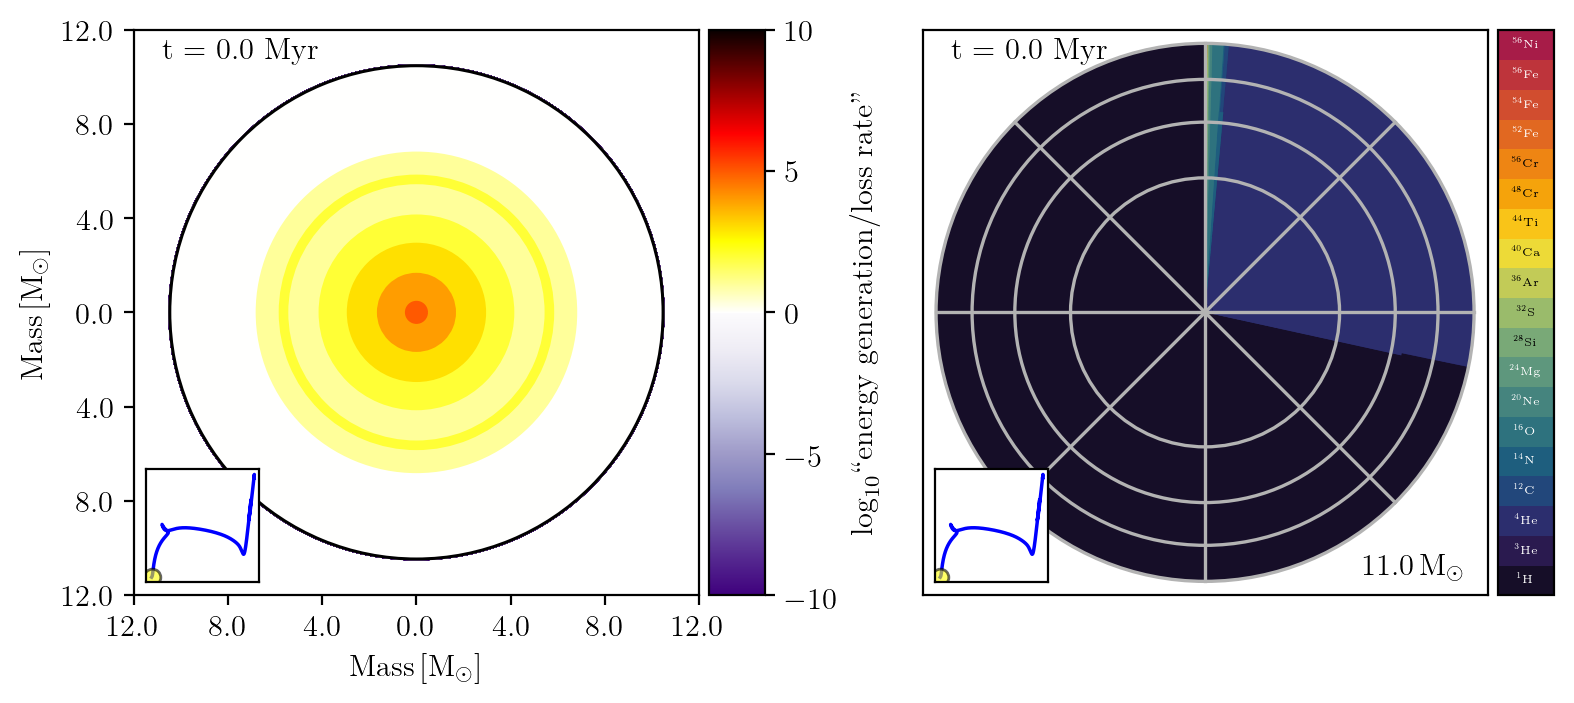

In [12]:
SINGLE_M11_DIR = "../../../../old_tulips_project/tulips/tulips/MESA_DIR_EXAMPLE/LOGS/"
m11.log_fold = SINGLE_M11_DIR

fig, ax = plt.subplots(1,2,figsize=(8,5))
tulips.energy_and_mixing(m11, time_ind=0, fig=fig, ax=ax[0])
tulips.chemical_profile(m11, time_ind=0, fig=fig, ax=ax[1])
fig.tight_layout() # To make sure the axis labels don't overlap
plt.show()